In [16]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import scooby

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from torch.utils.data import TensorDataset, DataLoader 
from torchsummary import summary

## Rosenbrock function


$$
f(x, y)= (a-x)^2 + b(y-x^2)^2 \quad a=1,b=10
$$



In [31]:
class Rosenbrock(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, coords):
        a, b = 1, 10
        x = coords[:, 0]
        y = coords[:, 1]
        f = (a - x)**2 + b *(y - x**2)**2
        return f

# Using the Adam optimizer 

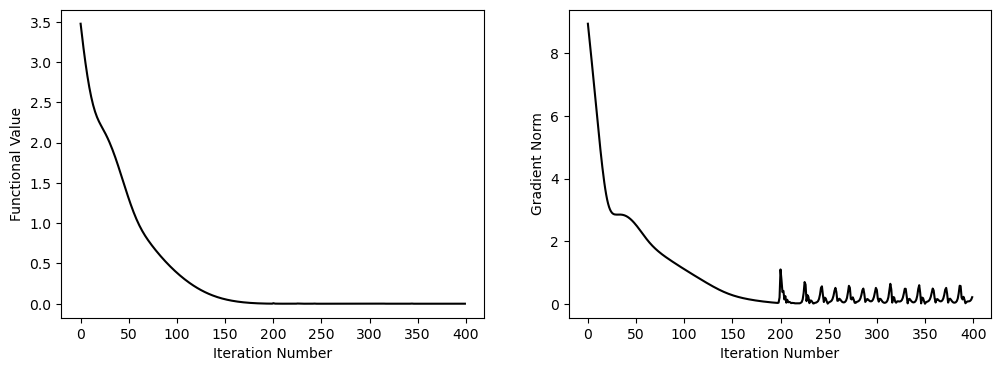

In [32]:
rosenbrock_torch = Rosenbrock()

coords = np.array([-.25, .5]).reshape(1, 2)
coords = torch.from_numpy(coords)
coords.requires_grad = True
optimizer = torch.optim.Adam([coords], lr=1e-2, betas=(0.5, 0.9))

steps = []
funcs = []
grads = []
for i in range(400):
    optimizer.zero_grad()
    f = rosenbrock_torch(coords)
    f.backward()
    optimizer.step()
    steps.append(coords.detach().numpy().copy().squeeze())
    funcs.append(f.detach().numpy().copy())
    grads.append(coords.grad.norm().detach().numpy().copy())
    #print("Steps ", steps)
    #print("funcs ", funcs)
    #print("grads ", grads)
    
fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(funcs, 'k')
ax[0].set_xlabel("Iteration Number")
ax[0].set_ylabel("Functional Value")
ax[1].plot(grads, 'k')
ax[1].set_xlabel("Iteration Number")
ax[1].set_ylabel("Gradient Norm");

# Using the SGD optimizer 

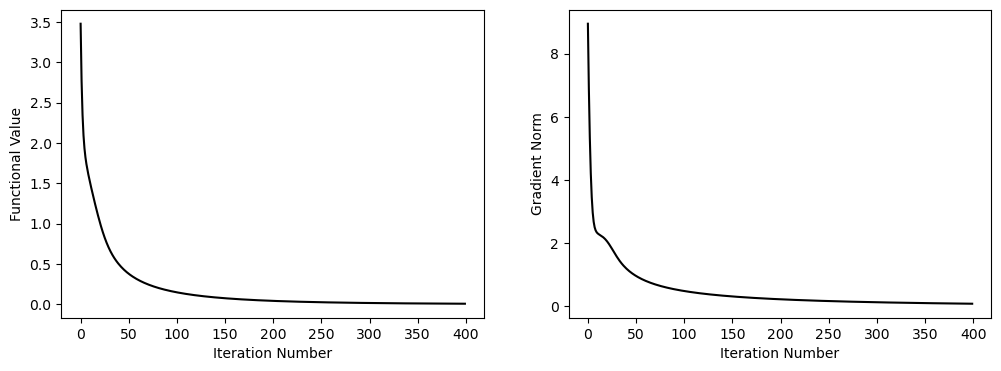

In [22]:
# SGD optimizer 

rosenbrock_torch = Rosenbrock()

coords = np.array([-.25, .5]).reshape(1, 2)
coords = torch.from_numpy(coords)
coords.requires_grad = True
optimizer = torch.optim.SGD([coords], lr=1e-2)

steps = []
funcs = []
grads = []
for i in range(400):
    optimizer.zero_grad()
    f = rosenbrock_torch(coords)
    f.backward()
    optimizer.step()
    steps.append(coords.detach().numpy().copy().squeeze())
    funcs.append(f.detach().numpy().copy())
    grads.append(coords.grad.norm().detach().numpy().copy())
    
    
fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(funcs, 'k')
ax[0].set_xlabel("Iteration Number")
ax[0].set_ylabel("Functional Value")
ax[1].plot(grads, 'k')
ax[1].set_xlabel("Iteration Number")
ax[1].set_ylabel("Gradient Norm");


# Using the Adagrad optimizer 

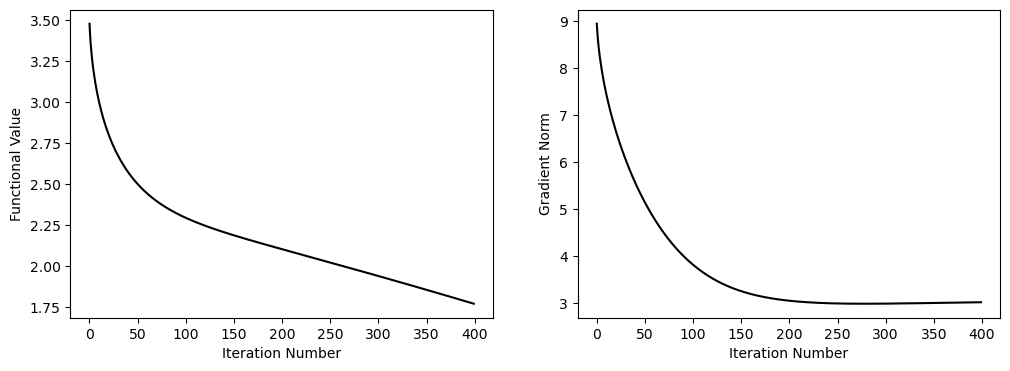

In [23]:
# Adagrad optimizer 

rosenbrock_torch = Rosenbrock()

coords = np.array([-.25, .5]).reshape(1, 2)
coords = torch.from_numpy(coords)
coords.requires_grad = True
optimizer = torch.optim.Adagrad([coords], lr=1e-2)

steps = []
funcs = []
grads = []
for i in range(400):
    optimizer.zero_grad()
    f = rosenbrock_torch(coords)
    f.backward()
    optimizer.step()
    steps.append(coords.detach().numpy().copy().squeeze())
    funcs.append(f.detach().numpy().copy())
    grads.append(coords.grad.norm().detach().numpy().copy())
    
    
fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(funcs, 'k')
ax[0].set_xlabel("Iteration Number")
ax[0].set_ylabel("Functional Value")
ax[1].plot(grads, 'k')
ax[1].set_xlabel("Iteration Number")
ax[1].set_ylabel("Gradient Norm");


# Using the RMSProp optimizer 

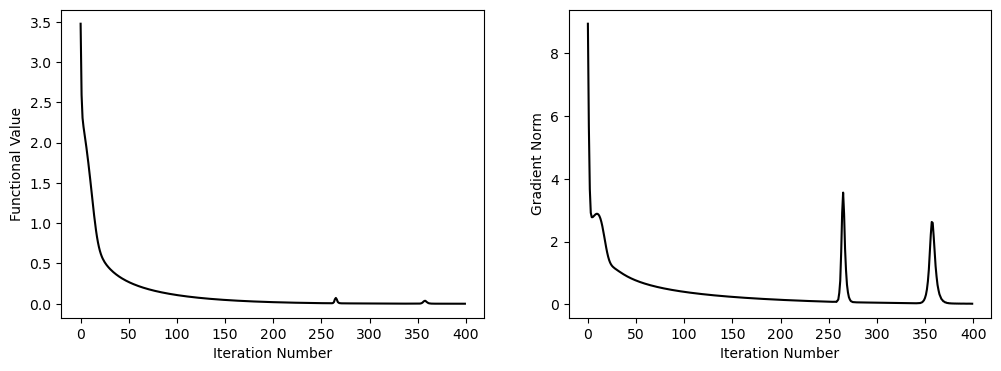

In [24]:
#RMSProp optimizer 

rosenbrock_torch = Rosenbrock()

coords = np.array([-.25, .5]).reshape(1, 2)
coords = torch.from_numpy(coords)
coords.requires_grad = True
optimizer = torch.optim.RMSprop([coords], lr=1e-2)

steps = []
funcs = []
grads = []
for i in range(400):
    optimizer.zero_grad()
    f = rosenbrock_torch(coords)
    f.backward()
    optimizer.step()
    steps.append(coords.detach().numpy().copy().squeeze())
    funcs.append(f.detach().numpy().copy())
    grads.append(coords.grad.norm().detach().numpy().copy())
    
    
fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(funcs, 'k')
ax[0].set_xlabel("Iteration Number")
ax[0].set_ylabel("Functional Value")
ax[1].plot(grads, 'k')
ax[1].set_xlabel("Iteration Number")
ax[1].set_ylabel("Gradient Norm");

# Comparison comments

It can be seen from the graphs that Adam optimizer converges to the global minimum of the Rosenbrock function faster than the other optimizers it took about 200 iterations to do so, but the SGD is very close after Adam with 250 iterations. 
follows these two the RMSProp optimizer with a little erratic path.
lastly the Adagrad optimizer, it took more than 400 to converge to the global minimum of the Rosenbrock function.

## Booth function


$$
f(x, y)= (x+2y-7)^2 + (2x+y-5)^2
$$

In [33]:
class Booth(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, coords):
     
        x = coords[:, 0]
        y = coords[:, 1]
        f = (x+2*y-7)**2 + (2*x+y-5)**2
        return f

# Using the Adam optimizer 

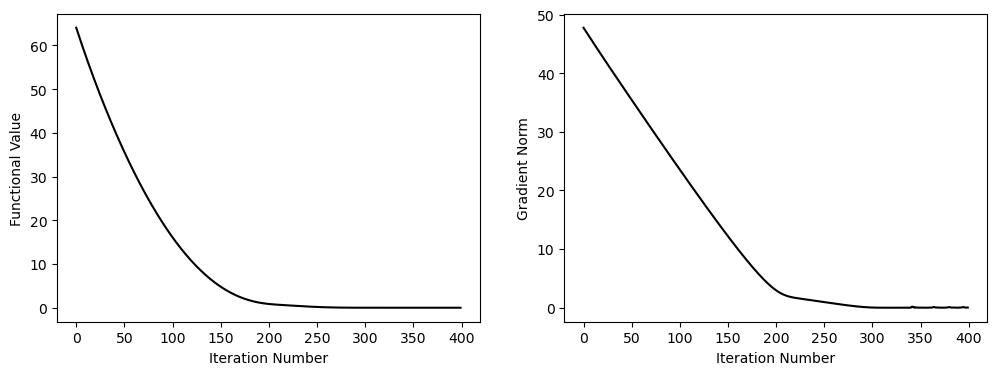

In [27]:
#adam

booth_torch = Booth()

coords = np.array([-.25, .5]).reshape(1, 2)
coords = torch.from_numpy(coords)
coords.requires_grad = True
optimizer = torch.optim.Adam([coords], lr=1e-2, betas=(0.5, 0.9))

steps = []
funcs = []
grads = []
for i in range(400):
    optimizer.zero_grad()
    f = booth_torch(coords)
    f.backward()
    optimizer.step()
    steps.append(coords.detach().numpy().copy().squeeze())
    funcs.append(f.detach().numpy().copy())
    grads.append(coords.grad.norm().detach().numpy().copy())
  
    
fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(funcs, 'k')
ax[0].set_xlabel("Iteration Number")
ax[0].set_ylabel("Functional Value")
ax[1].plot(grads, 'k')
ax[1].set_xlabel("Iteration Number")
ax[1].set_ylabel("Gradient Norm");

# Using the SGD optimizer 

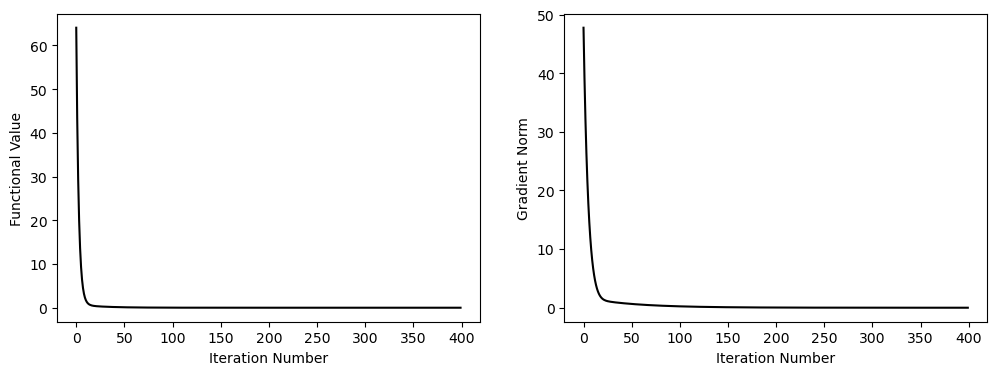

In [28]:
#SGD

booth_torch = Booth()

coords = np.array([-.25, .5]).reshape(1, 2)
coords = torch.from_numpy(coords)
coords.requires_grad = True
optimizer = torch.optim.SGD([coords], lr=1e-2)

steps = []
funcs = []
grads = []
for i in range(400):
    optimizer.zero_grad()
    f = booth_torch(coords)
    f.backward()
    optimizer.step()
    steps.append(coords.detach().numpy().copy().squeeze())
    funcs.append(f.detach().numpy().copy())
    grads.append(coords.grad.norm().detach().numpy().copy())
    
    
fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(funcs, 'k')
ax[0].set_xlabel("Iteration Number")
ax[0].set_ylabel("Functional Value")
ax[1].plot(grads, 'k')
ax[1].set_xlabel("Iteration Number")
ax[1].set_ylabel("Gradient Norm");

# Using the Adagrad optimizer 

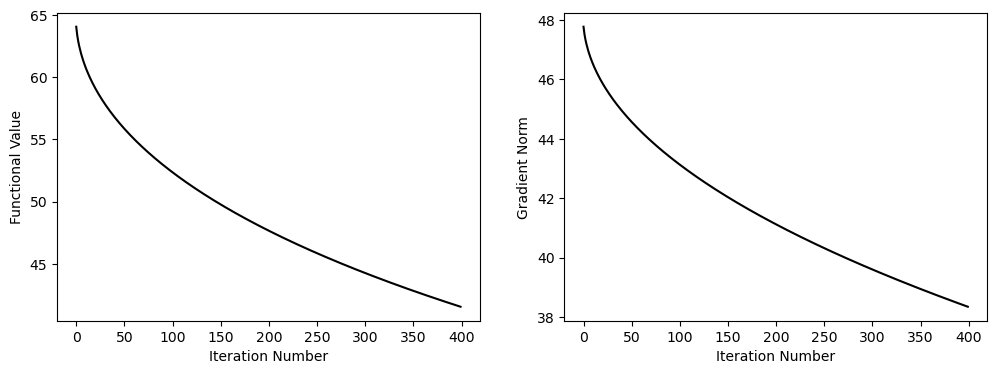

In [ ]:
#Adagrad

booth_torch = Booth()

coords = np.array([-.25, .5]).reshape(1, 2)
coords = torch.from_numpy(coords)
coords.requires_grad = True
optimizer = torch.optim.Adagrad([coords], lr=1e-2)

steps = []
funcs = []
grads = []
for i in range(400):
    optimizer.zero_grad()
    f = booth_torch(coords)
    f.backward()
    optimizer.step()
    steps.append(coords.detach().numpy().copy().squeeze())
    funcs.append(f.detach().numpy().copy())
    grads.append(coords.grad.norm().detach().numpy().copy())
    
    
fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(funcs, 'k')
ax[0].set_xlabel("Iteration Number")
ax[0].set_ylabel("Functional Value")
ax[1].plot(grads, 'k')
ax[1].set_xlabel("Iteration Number")
ax[1].set_ylabel("Gradient Norm");

# Using the RMSProp optimizer 

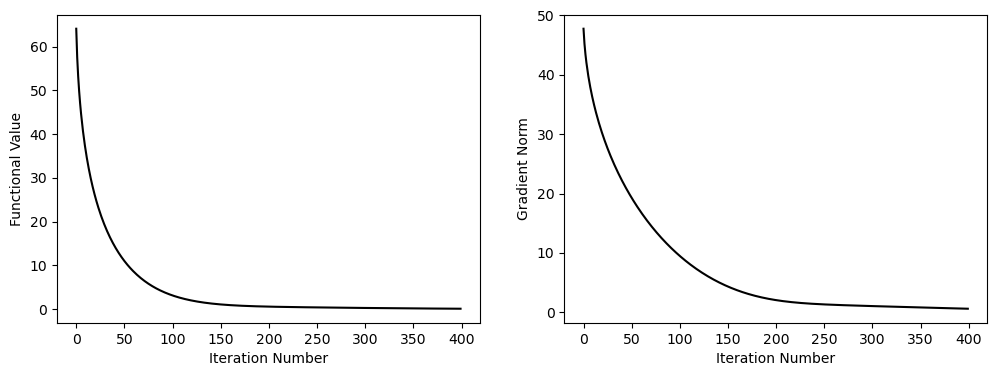

In [30]:
#RMSprop

booth_torch = Booth()

coords = np.array([-.25, .5]).reshape(1, 2)
coords = torch.from_numpy(coords)
coords.requires_grad = True
optimizer = torch.optim.RMSprop([coords], lr=1e-2)

steps = []
funcs = []
grads = []
for i in range(400):
    optimizer.zero_grad()
    f = booth_torch(coords)
    f.backward()
    optimizer.step()
    steps.append(coords.detach().numpy().copy().squeeze())
    funcs.append(f.detach().numpy().copy())
    grads.append(coords.grad.norm().detach().numpy().copy())
    
fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(funcs, 'k')
ax[0].set_xlabel("Iteration Number")
ax[0].set_ylabel("Functional Value")
ax[1].plot(grads, 'k')
ax[1].set_xlabel("Iteration Number")
ax[1].set_ylabel("Gradient Norm");

# Comparison comments 

It can be seen from the graphs that SGD optimizer took just couple of few iterations to converges to the global minimum of the Booth function, which make it the preferable optimizer in general. 
the Adam and RMSProp have similiar behaviours, booth took approx. 200 iterations to converge to the global minimum of the booth function.
lastly the Adagrad optimizer, it took more than 400 to converge to the global minimum of the booth function which make it the least preferable option as it performed the poorest.